<a href="https://colab.research.google.com/github/varunkr24/Natural-Language-Processing/blob/Python/NLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blog Authorship Corpus
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multilabel classification problem. Dataset Blog Authorship Corpus

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and age but for many, industry and/or sign is marked as unknown.)

All bloggers included in the corpus fall into one of three age groups: 8240 "10s" blogs (ages 13-17), 8086 "20s" blogs(ages 23-27) 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

STEPS:    
1.Import and analyse the data set.   
2.Perform data pre-processing on the data:   
•Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.   
•Target/label merger and transformation   
•Train and test split   
•Vectorisation, etc.   
3.Design, train, tune and test the best text classifier.   
4.Display and explain detail the classification report   
5.Print the true vs predicted labels for any 5 entries from the dataset.

In [1]:
import pandas as pd
import numpy as np 
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/durgaprasadk10/blog-authorship-corpus-solution

In [3]:
df = pd.read_csv('/content/drive/My Drive/AIML/Projects/blogtext.csv')

In [4]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
df.shape

(681284, 7)

In [6]:
df.sample(5)

,id,gender,age,topic,sign,date,text
114375,3765746,female,16,indUnk,Aquarius,"30,June,2004",Well today was just interesting. A...
48954,3824594,male,27,Advertising,Virgo,"01,August,2004",I was in traffic school last night....
126386,3667467,male,24,Student,Taurus,"18,June,2004",From now on my weblog posts will be her...
415707,3572706,male,17,indUnk,Gemini,"21,June,2004",there is a pic of the flyer at www....
312850,581839,female,16,Student,Taurus,"02,August,2004",Now homework is really bad. but i s...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [8]:
df.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [11]:
df.gender.value_counts(normalize=True)

male      0.50668
female    0.49332
Name: gender, dtype: float64

In [12]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

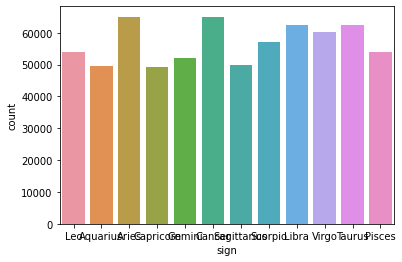

In [13]:
sns.countplot(x='sign',data=df)

As the dataset is large and it is unable run on machine so limiting the data and using fewer rows.

In [14]:
  df = df.sample(100000)

In [15]:
df.gender.value_counts()

male      50570
female    49430
Name: gender, dtype: int64

In [16]:
df.head(5)

,id,gender,age,topic,sign,date,text
142238,3898853,male,16,indUnk,Scorpio,"12,July,2004",I found this on andother blog and i thi...
218859,303162,female,38,indUnk,Virgo,"30,May,2004",The urlLink Friday Five : 1. How are...
8999,3477296,male,15,Student,Virgo,"16,July,2004",Seems like everyone these day...
378837,2268074,male,47,BusinessServices,Leo,"12,April,2004",I really liked the article I link to bel...
465064,1524664,female,23,Law,Capricorn,"01,February,2004",I never want to see Justin Timberlake...


**Preprocess rows of the “text” column**  
a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [17]:
pattern = "[^\w ]"
df.text = df.text.apply(lambda s : re.sub(pattern,"",s))

In [18]:
df.head()

,id,gender,age,topic,sign,date,text
142238,3898853,male,16,indUnk,Scorpio,"12,July,2004",I found this on andother blog and i thi...
218859,303162,female,38,indUnk,Virgo,"30,May,2004",The urlLink Friday Five 1 How are y...
8999,3477296,male,15,Student,Virgo,"16,July,2004",Seems like everyone these day...
378837,2268074,male,47,BusinessServices,Leo,"12,April,2004",I really liked the article I link to bel...
465064,1524664,female,23,Law,Capricorn,"01,February,2004",I never want to see Justin Timberlake...


**Convert text to lower case**

In [19]:
df.text = df.text.apply(lambda s: s.lower())  

**Remove unwanted spaces**

In [20]:
df.text = df.text.apply(lambda s: s.strip())

**Remove stopwords**

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stopwords= set(stopwords.words('english'))

In [23]:
df.text = df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [24]:
df.head()

,id,gender,age,topic,sign,date,text
142238,3898853,male,16,indUnk,Scorpio,"12,July,2004",found andother blog think quite good good idea...
218859,303162,female,38,indUnk,Virgo,"30,May,2004",urllink friday five 1 planning spend summer li...
8999,3477296,male,15,Student,Virgo,"16,July,2004",seems like everyone days turning religion time...
378837,2268074,male,47,BusinessServices,Leo,"12,April,2004",really liked article link written journalist a...
465064,1524664,female,23,Law,Capricorn,"01,February,2004",never want see justin timberlake dryhumping ja...


**Drop id and date columns**

In [25]:
df.drop(labels=['id','date'], axis=1, inplace = True)

As we want to make this into a multi-label classification problem, it is required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [26]:
df['labels'] = df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [27]:
df.head()


,gender,age,topic,sign,text,labels
142238,male,16,indUnk,Scorpio,found andother blog think quite good good idea...,"[male, 16, indUnk, Scorpio]"
218859,female,38,indUnk,Virgo,urllink friday five 1 planning spend summer li...,"[female, 38, indUnk, Virgo]"
8999,male,15,Student,Virgo,seems like everyone days turning religion time...,"[male, 15, Student, Virgo]"
378837,male,47,BusinessServices,Leo,really liked article link written journalist a...,"[male, 47, BusinessServices, Leo]"
465064,female,23,Law,Capricorn,never want see justin timberlake dryhumping ja...,"[female, 23, Law, Capricorn]"


In [28]:
df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [29]:
df.head()

,text,labels
142238,found andother blog think quite good good idea...,"[male, 16, indUnk, Scorpio]"
218859,urllink friday five 1 planning spend summer li...,"[female, 38, indUnk, Virgo]"
8999,seems like everyone days turning religion time...,"[male, 15, Student, Virgo]"
378837,really liked article link written journalist a...,"[male, 47, BusinessServices, Leo]"
465064,never want see justin timberlake dryhumping ja...,"[female, 23, Law, Capricorn]"


In [30]:
import copy
X= df.text.copy(deep = True)
y = df.labels.copy(deep=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [32]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(80000,)
(80000,)
(20000,)
(20000,)


(None, None)

In [33]:
X_test.head()

76586     whatever tuesday night nbsp update blogs new o...
520698    almost new year totally buzzinrightoff alcohol...
531643    sleepy man heavy lunch cassandra new harbour c...
274917    travis company planned another lan party frida...
493217    im w c williams poetics readings im gonna real...
Name: text, dtype: object

**Vectorize the features**  
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [34]:
cvect = CountVectorizer(ngram_range=(1,2))

In [35]:
cvect.fit(X_train)

#Check the vocablury size

len(cvect.vocabulary_)

4748937

In [36]:
cvect.get_feature_names()

['00',
 '00 11',
 '00 also',
 '00 back',
 '00 became',
 '00 croatia',
 '00 duke',
 '00 iraqis',
 '00 know',
 '00 less',
 '00 lil',
 '00 match',
 '00 morning',
 '00 oh',
 '00 people',
 '00 power',
 '00 say',
 '00 switzerland',
 '00 trip',
 '00 uppercase_75_100',
 '00 went',
 '000',
 '000 000',
 '000 abortions',
 '000 barbarella',
 '000 came',
 '000 categories',
 '000 day',
 '000 dollar',
 '000 dong',
 '000 era',
 '000 festival',
 '000 first',
 '000 ibos',
 '000 imams',
 '000 jobs',
 '000 medical',
 '000 might',
 '000 motherfuckers',
 '000 peeps',
 '000 people',
 '000 pounds',
 '000 riding',
 '000 rupees',
 '000 times',
 '000 tip',
 '000 unique',
 '000 visit',
 '000 visitor',
 '000 words',
 '000 years',
 '0000',
 '0000 0605',
 '0000 dege59',
 '0000 oclockand',
 '0000 tragedy',
 '00000',
 '00000 sound',
 '000000',
 '000000 colour',
 '000000 fontsize',
 '0000000',
 '0000000 0000000',
 '000000000',
 '000000000 write',
 '0000000000',
 '0000000000 项就以没为',
 '00000000000',
 '00000000000 write',

In [37]:
X_train_ct = cvect.transform(X_train)

In [39]:
X_train_ct

<80000x4748937 sparse matrix of type '<class 'numpy.int64'>'
	with 14287104 stored elements in Compressed Sparse Row format>

In [38]:
X_test_ct = cvect.transform(X_test)

In [40]:
print(X_train_ct)

  (0, 32523)	1
  (0, 32524)	1
  (0, 35165)	1
  (0, 35619)	1
  (0, 57209)	1
  (0, 97716)	1
  (0, 97719)	1
  (0, 138992)	1
  (0, 138995)	1
  (0, 427679)	1
  (0, 427682)	1
  (0, 471817)	1
  (0, 471833)	1
  (0, 563824)	1
  (0, 563943)	1
  (0, 932809)	1
  (0, 932848)	1
  (0, 992009)	1
  (0, 992086)	1
  (0, 1193122)	1
  (0, 1193126)	1
  (0, 1234754)	1
  (0, 1234794)	1
  (0, 1463419)	1
  (0, 1464152)	1
  :	:
  (79999, 4192966)	2
  (79999, 4195543)	1
  (79999, 4198670)	1
  (79999, 4214896)	1
  (79999, 4214900)	1
  (79999, 4239328)	1
  (79999, 4240800)	1
  (79999, 4284605)	1
  (79999, 4316023)	1
  (79999, 4316881)	1
  (79999, 4320432)	1
  (79999, 4321529)	1
  (79999, 4373619)	1
  (79999, 4373853)	1
  (79999, 4463762)	1
  (79999, 4463846)	1
  (79999, 4484430)	1
  (79999, 4486609)	1
  (79999, 4538222)	1
  (79999, 4538518)	1
  (79999, 4659684)	3
  (79999, 4659978)	1
  (79999, 4663422)	2
  (79999, 4704217)	1
  (79999, 4704781)	1


Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference

In [41]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [42]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 553,
 'Advertising': 677,
 'Agriculture': 204,
 'Aquarius': 7130,
 'Architecture': 255,
 'Aries': 9600,
 'Arts': 4872,
 'Automotive': 201,
 'Banking': 581,
 'Biotech': 330,
 'BusinessServices': 659,
 'Cancer': 9491,
 'Capricorn': 7307,
 'Chemicals': 555,
 'Communications-Media': 2976,
 'Construction': 157,
 'Consulting': 866,
 'Education': 4324,
 'Engineering': 1733,
 'Environment': 84,
 'Fashion': 735,
 'Gemini': 7612,
 'Government': 1032,
 'HumanResources': 440,
 'Internet': 2349,
 'InvestmentBanking': 193,
 'Law': 1293,
 'LawEnforcement-Security': 299,
 'Leo': 7757,
 'Libra': 9174,
 'Manufacturing': 330,
 'Maritime': 29,
 'Marketing': 726,
 'Military': 455,
 'Museums-Libraries': 460,
 'Non-Profit': 2142,
 'Pisces

**Transform the labels**   
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn    
a. Convert your train and test labels using MultiLabelBinarizer

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [44]:
y_train = binarizer.fit_transform(y_train)

In [45]:
y_test = binarizer.transform(y_test)

In [46]:
y_test

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [47]:
y_train

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

**Choose a classifier**
In this task,the One-vs-Rest approach is used, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, LogisticRegression is used. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

**Fit the classifier, make predictions and get the accuracy**   
Print the following     
i. Accuracy score ii. F1 score iii. Average precision score iv. Average recall score

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [54]:
Ypred=model.predict(X_test_ct)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


In [51]:
def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))

def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [55]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.01705
F1 score: Micro 0.34057962209125703
Average precision score: Micro 0.17555458333333332
Average recall score: Micro 0.23356666666666667


In [56]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.01705
F1 score: Macro 0.046692508059742996
Average recall score: MAcro 0.031948141882554626


In [57]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.01705
F1 score: weighted 0.2848297882825551
Average precision score: weighted 0.30901362599297244
Average recall score: weighted 0.23356666666666667


**Print true label and predicted label for any five examples**

In [58]:
preds = Ypred[:15]
actuals = y_test[:15]

In [59]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Taurus', 'female', 'indUnk'),
 ('Gemini', 'indUnk', 'male'),
 ('Aries', 'Communications-Media', 'female'),
 ('Communications-Media', 'Leo', 'male'),
 ('Arts', 'Libra', 'female'),
 ('Taurus', 'indUnk', 'male'),
 ('Aries', 'Student', 'male'),
 ('Scorpio', 'indUnk', 'male'),
 ('Capricorn', 'Communications-Media', 'female'),
 ('Taurus', 'indUnk', 'male'),
 ('Aries', 'female', 'indUnk'),
 ('Libra', 'female', 'indUnk'),
 ('Aquarius', 'female', 'indUnk'),
 ('Internet', 'Pisces', 'male'),
 ('Non-Profit', 'Virgo', 'female')]

In [60]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('female',),
 ('female',),
 ('female',),
 ('male',),
 ('male',),
 ('Student',),
 ('male',),
 ('male',),
 ('male',),
 (),
 ('female',),
 ('female',),
 ('female',),
 ('indUnk',),
 ()]

In [61]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('male',)
('Military', 'Scorpio', 'female')


In [62]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

('female',)
('Student', 'Virgo', 'male')


In [63]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('male',)
('Aquarius', 'Communications-Media', 'male')


In [64]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('male',)
('Leo', 'indUnk', 'male')


In [65]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('male',)
('Gemini', 'indUnk', 'male')


**Print true label and predicted label for any five examples**

In [66]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[8873, 3081, 16886, 11618, 13793]
('female', 'indUnk')
('Religion', 'Virgo', 'female')
('male',)
('Gemini', 'Technology', 'male')
('female', 'indUnk')
('Capricorn', 'female', 'indUnk')
('male',)
('Gemini', 'female', 'indUnk')
('indUnk', 'male')
('Internet', 'Leo', 'male')


**Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label**

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

Accuracy score:  0.0316
F1 score: Micro 0.34673764642443294
Average precision score: Micro 0.16817216525993153
Average recall score: Micro 0.25185




Accuracy score:  0.0316
F1 score: Macro 0.08492649077038514
Average recall score: MAcro 0.05755427425